In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import f1_score, confusion_matrix, recall_score, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mp_features = pd.read_csv("features.csv")
mp_sales = pd.read_csv("stores.csv")
mp1 = pd.read_csv("train1.csv")
mp2 = pd.read_csv("test12.csv")

In [3]:
mp_features['Weekly_Sales'] = mp1['Weekly_Sales']
mp_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,46039.49
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,41595.55
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,19403.54
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,21827.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,16501.99
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,16269.33
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,16911.18
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,20426.69


In [4]:
mp_sales.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
mp_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,24924.50
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,46039.49
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,41595.55
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,19403.54
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,21827.90


In [6]:
mp1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [7]:
mp2.head()

,Store,Dept,Date,IsHoliday
0,1,1,02-11-2012,False
1,1,1,09-11-2012,False
2,1,1,16-11-2012,False
3,1,1,23-11-2012,True
4,1,1,30-11-2012,False


In [8]:
for p in mp_features.columns:
    print(f"Unique values of {p}'s are: {mp_features[p].nunique()}")
    print(f"{mp_features[p].unique()}\n")
for r in mp_sales.columns:    
    print(f"Unique values of {r}'s are: {mp_sales[r].nunique()}")
    print(f"{mp_sales[r].unique()}\n")
for q in mp1.columns:    
    print(f"Unique values of {q}'s are: {mp1[q].nunique()}")
    print(f"{mp1[q].unique()}\n")
for s in mp2.columns:    
    print(f"Unique values of {r}'s are: {mp2[s].nunique()}")
    print(f"{mp2[s].unique()}\n")

Unique values of Store's are: 45
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]

Unique values of Date's are: 182
['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09'
 '2010-04-16' '2010-04-23' '2010-04-30' '2010-05-07' '2010-05-14'
 '2010-05-21' '2010-05-28' '2010-06-04' '2010-06-11' '2010-06-18'
 '2010-06-25' '2010-07-02' '2010-07-09' '2010-07-16' '2010-07-23'
 '2010-07-30' '2010-08-06' '2010-08-13' '2010-08-20' '2010-08-27'
 '2010-09-03' '2010-09-10' '2010-09-17' '2010-09-24' '2010-10-01'
 '2010-10-08' '2010-10-15' '2010-10-22' '2010-10-29' '2010-11-05'
 '2010-11-12' '2010-11-19' '2010-11-26' '2010-12-03' '2010-12-10'
 '2010-12-17' '2010-12-24' '2010-12-31' '2011-01-07' '2011-01-14'
 '2011-01-21' '2011-01-28' '2011-02-04' '2011-02-11' '2011-02-18'
 '2011-02-25' '2011-03-04' '2011-03-11' '2011-03-18' '2011-03-25'
 '2

In [9]:
mp_features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [10]:
mp_sales.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [11]:
mp1.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
mp2.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [13]:
mp_features['MarkDown1'] = mp_features['MarkDown1'].fillna(0)
mp_features['MarkDown2'] = mp_features['MarkDown2'].fillna(0)
mp_features['MarkDown3'] = mp_features['MarkDown3'].fillna(0)
mp_features['MarkDown4'] = mp_features['MarkDown4'].fillna(0)
mp_features['MarkDown5'] = mp_features['MarkDown5'].fillna(0)
meanreplacement1 = mp_features['CPI'].mean()
mp_features['CPI'].fillna(value=meanreplacement1, inplace=True)
meanreplacement2 = mp_features['Unemployment'].mean()
mp_features['Unemployment'].fillna(value=meanreplacement2, inplace=True)
mp_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,24924.50
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,46039.49
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,41595.55
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,19403.54
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,21827.90


In [14]:
mp_features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

In [15]:
walmart = pd.merge(mp_features, mp_sales)
walmart = walmart[['Date','Type','Store','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday','Weekly_Sales']]
walmart = walmart.sort_values(by='Date')
walmart.head()

,Date,Type,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
0,2010-02-05,A,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,24924.50
2730,2010-02-05,B,16,57197,19.79,2.580,0.0,0.0,0.0,0.0,0.0,189.381697,7.039,False,8844.39
5460,2010-02-05,A,31,203750,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,663.00
3640,2010-02-05,B,21,140167,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,1752.13
4550,2010-02-05,A,26,152513,9.55,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,8.488,False,12571.50


In [16]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8190 non-null   object 
 1   Type          8190 non-null   object 
 2   Store         8190 non-null   int64  
 3   Size          8190 non-null   int64  
 4   Temperature   8190 non-null   float64
 5   Fuel_Price    8190 non-null   float64
 6   MarkDown1     8190 non-null   float64
 7   MarkDown2     8190 non-null   float64
 8   MarkDown3     8190 non-null   float64
 9   MarkDown4     8190 non-null   float64
 10  MarkDown5     8190 non-null   float64
 11  CPI           8190 non-null   float64
 12  Unemployment  8190 non-null   float64
 13  IsHoliday     8190 non-null   bool   
 14  Weekly_Sales  8190 non-null   float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 967.8+ KB


In [17]:
walmart.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,130287.600000,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,172.460809,7.826821,14512.599277
std,12.987966,63115.971429,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,38.292649,1.808963,17323.561702
min,1.000000,34875.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,-863.000000
25%,12.000000,70713.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653774,6.833000,2725.852500
50%,23.000000,126512.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.460809,7.826821,7947.910000
75%,34.000000,202307.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000,19407.757500
max,45.000000,219622.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,203670.470000


In [18]:
walmart.corr()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales
Store,1.000000e+00,-2.442698e-01,-0.020566,0.066682,-0.086875,-0.051160,-0.027943,-0.056059,-0.008213,-0.201670,0.213108,-1.619709e-16,-0.214160
Size,-2.442698e-01,1.000000e+00,-0.093345,0.015080,0.223051,0.115565,0.047234,0.160590,0.103335,-0.009406,-0.073387,1.490143e-16,-0.178376
Temperature,-2.056605e-02,-9.334549e-02,1.000000,0.101354,-0.114759,-0.220157,-0.062782,-0.084683,-0.019703,0.158709,0.145643,-1.619056e-01,0.071040
Fuel_Price,6.668205e-02,1.507973e-02,0.101354,1.000000,0.262974,0.030076,0.028349,0.148889,0.100203,-0.184127,-0.032900,-7.823797e-02,-0.072805
MarkDown1,-8.687521e-02,2.230515e-01,-0.114759,0.262974,1.000000,0.157191,-0.018466,0.826422,0.178319,0.011579,-0.125634,1.097352e-01,-0.050545
MarkDown2,-5.116017e-02,1.155649e-01,-0.220157,0.030076,0.157191,1.000000,-0.016411,0.068612,0.049990,-0.005533,-0.069098,2.082465e-01,-0.025733
MarkDown3,-2.794349e-02,4.723418e-02,-0.062782,0.028349,-0.018466,-0.016411,1.000000,-0.014163,0.010083,-0.004009,-0.034171,3.187497e-01,-0.005120
MarkDown4,-5.605868e-02,1.605896e-01,-0.084683,0.148889,0.826422,0.068612,-0.014163,1.000000,0.119594,-0.008947,-0.077243,9.978873e-02,-0.049143
MarkDown5,-8.212923e-03,1.033354e-01,-0.019703,0.100203,0.178319,0.049990,0.010083,0.119594,1.000000,0.018244,-0.043458,-1.223194e-02,-0.034026
CPI,-2.016696e-01,-9.405843e-03,0.158709,-0.184127,0.011579,-0.005533,-0.004009,-0.008947,0.018244,1.000000,-0.303110,1.005442e-03,0.129884


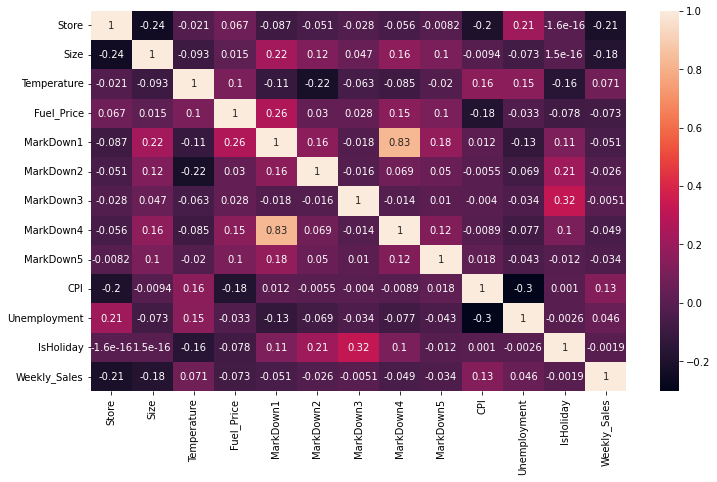

In [19]:
#sns.pairplot(walmart, hue='IsHoliday')
#plt.show()
plt.figure(figsize=(12,7))
pearson_correlation = walmart.corr()
sns.heatmap(pearson_correlation, annot=True)
plt.show()

In [20]:
print('sales on non-holiday : ',walmart[walmart['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',walmart[walmart['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  7605
sales on holiday :  585


In [21]:
X = walmart.iloc[:,2:14] 
y = walmart.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
pip install xgboost

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Linear Regression

In [25]:
linear = LinearRegression()
linear.fit(X_train, y_train)

linear_predict = linear.predict(X_test)

linear_accuracy =  linear.score(X_test, y_test)

KNN

In [26]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

knn_accuracy = knn.score(X_test, y_test)

Decision Tree

In [27]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

dtree_predict = dtree.predict(X_test)

dtree_accuracy = dtree.score(X_test, y_test)

Random Forest

In [28]:
ran_fo = RandomForestRegressor()
ran_fo.fit(X_train, y_train)

ran_fo_predict = ran_fo.predict(X_test)

ran_fo_accuracy = ran_fo.score(X_test, y_test) 

XGB Regressor

In [29]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_predict = xgb.predict(X_test)

xgb_accuracy = xgb.score(X_test, y_test)

In [30]:
mc = pd.DataFrame({'Model': ['Linear Regression', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'XGB Regressor'], 'Score': [linear_accuracy, knn_accuracy, dtree_accuracy, ran_fo_accuracy, xgb_accuracy]})
mc_s = mc.sort_values(by = 'Score', ascending = False)
mc_s = mc_s.set_index('Score')
mc_s

,Model
Score,
0.921991,Random Forest
0.907324,XGB Regressor
0.858272,Decision Tree
0.582736,K-Nearest Neighbor
0.104042,Linear Regression


Exploring Random Forest Regressor model

For sales forecasting

In [31]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, random_state=100)
reg.fit(X_train, y_train)

reg_predict = reg.predict(X_test)

In [32]:
Mean_Absolute_Error = mean_absolute_error(y_test, reg_predict) 
print('MAE:',Mean_Absolute_Error)
Mean_Squared_Error = mean_squared_error(y_test, reg_predict)
print('MSE:',Mean_Squared_Error)
Root_Mean_Squared_Error =np.sqrt(mean_squared_error(y_test, reg_predict))
print('RMSE:',Root_Mean_Squared_Error)

MAE: 2191.668391764346
MSE: 20653163.59169674
RMSE: 4544.57518275325


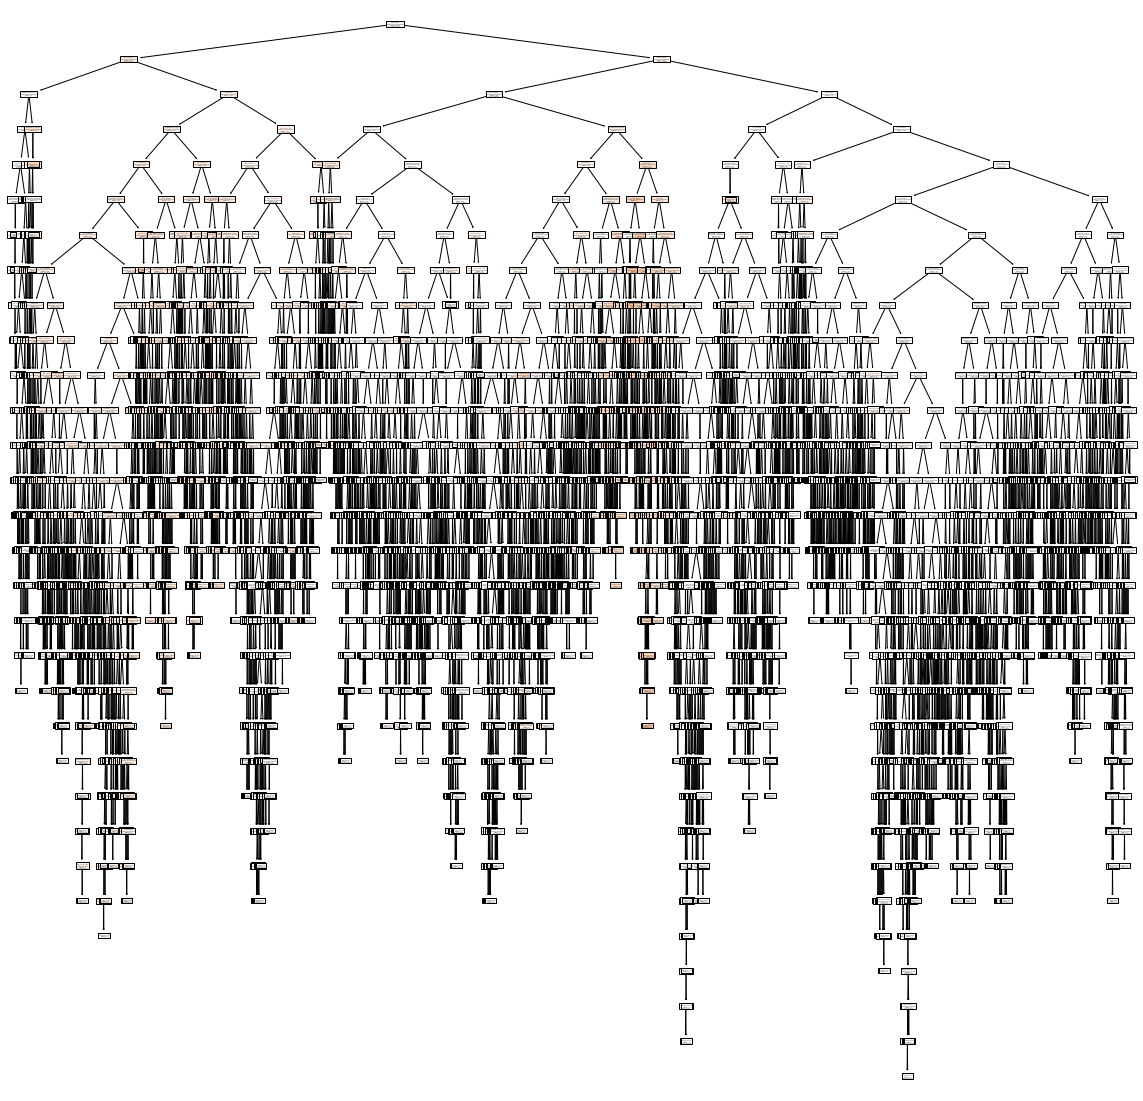

In [33]:
from sklearn import tree
plt.figure(figsize=(20,20))
random_forest = tree.plot_tree(reg.estimators_[0], feature_names = X.columns, filled=True)

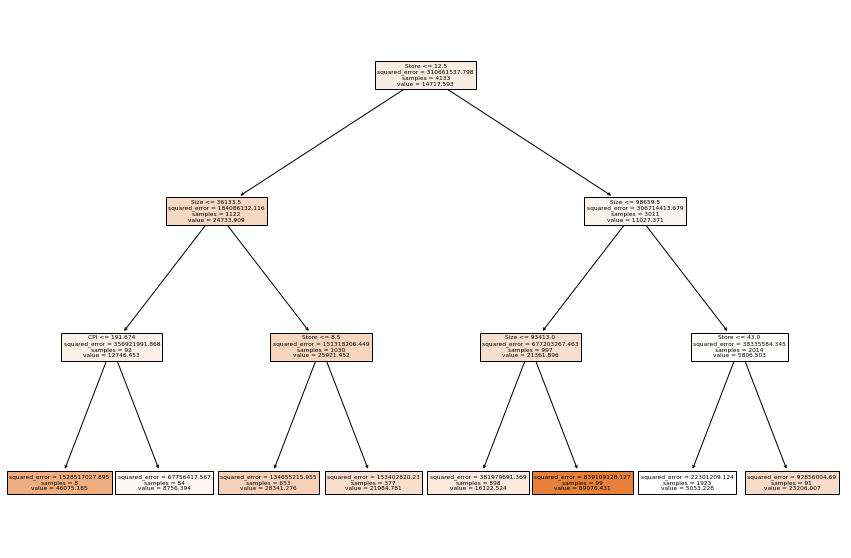

In [34]:
ranreg = RandomForestRegressor(n_estimators=1000, max_depth=3)
ranreg.fit(X_train, y_train)
plt.figure(figsize=(15,10))
reanreg_plot = tree.plot_tree(ranreg.estimators_[0], feature_names=X.columns, filled=True)

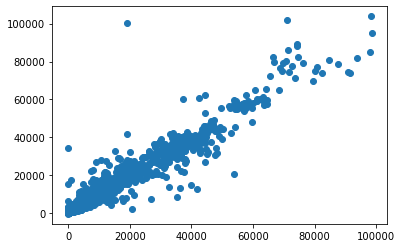

In [36]:
plt.scatter(y_test, reg_predict)
plt.show()

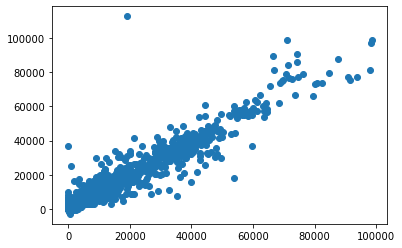

In [38]:
plt.scatter(y_test, xgb_predict)
plt.show()

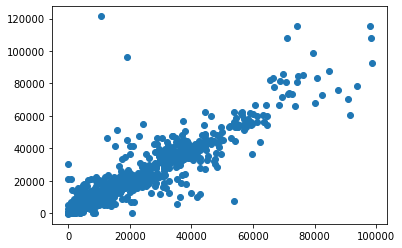

In [39]:
plt.scatter(y_test, dtree_predict)
plt.show()

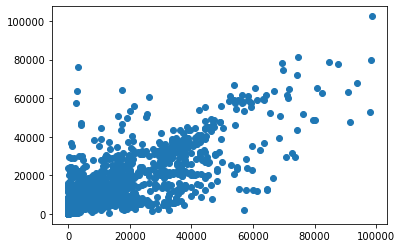

In [40]:
plt.scatter(y_test, knn_predict)
plt.show()

In [35]:
import time
start = time.time()
x = 0
for r in range(1000000):
    x += 1
time.sleep(3)
end = time.time()
execution = end - start
print("Execution time:", execution, "seconds." )

Execution time: 3.111436128616333 seconds.
